**Projektom je obuhvaćeno nekoliko celina:**

- Postavka projekta
- Prikupljanje resursa - dokumenata (web stranica)
- Podela dokumenata i embedding
- Postavka i rad sa vektorskom bazom
- Uvođenje generativnog modela
- Postavka logike za rad sa web pretragom
- Rad sa grafom (integracija prethodno prikazanih celina)


**Postavka projekta**



Instaliranje potrebnih alata za rad sa velikim jezičkim modelima. Ideja je da se kreira agent koji će odgovarati na pitanja o ekologiji i zaštiti životne sredine, sa fokusom na zakone u Republici Srbiji koji se primenjuju u ovim oblastima.


In [ ]:
!pip -q install langchain langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00


Instaliranje biblioteke za integraciju LangChain i Groq servisa, za pristup LLama 3.1 modelu.

In [ ]:
!pip -q install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 6.0 MB/s eta 0:00:00


Instaliranje biblioteke za embedding (pretvaranje teksta u vektore i kasnije poređenje kako bi se ustanovile sličnosti).

In [ ]:
!pip -q install sentence_transformers FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:

Instaliranje Tavily biblioteke kojom se obezbeđuje servis za rad sa web pretragom.

In [ ]:
!pip -q install tavily-python langchain-tavily

**Prikupljanje resursa - dokumenata (Web stranica)**

Učitavanje biblioteka za web scrapping - za nove izvore podataka koji će biti korišćeni.



In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
source_list = [
    'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html',
    'https://www.paragraf.rs/propisi/zakon_o_proceni_uticaja_na_zivotnu_sredinu.html',
    'https://www.paragraf.rs/propisi/zakon_o_strateskoj_proceni_uticaja_na_zivotnu_sredinu.html',
    'https://www.paragraf.rs/propisi/zakon_o_zastiti_vazduha.html',
    'https://www.paragraf.rs/propisi/zakon-o-kontroli-opasnosti-od-velikih-udesa-koji-ukljucuju-opasne-supstance.html'
]

In [ ]:
# primer šta se dobije kada pozovemo samo request.get(url)

# url = 'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html'

# response = requests.get(url)
# response

<Response [200]>

In [ ]:
# type(response)

requests.models.Response

In [ ]:
# response.text

'<!DOCTYPE html>\n<html lang="sr">\n\t<head>\n\t\t<!-- Google Tag Manager -->\n\t\t<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\t\tnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\t\tj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\t\t\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\t\t})(window,document,\'script\',\'dataLayer\',\'GTM-MMRQ5R6\');</script>\n\t\t<!-- End Google Tag Manager -->\n\t\t<title>Uredba o kriterijumima za odreÄ\x91ivanje aktivnosti koje utiÄ\x8du na Å¾ivotnu sredinu i iznosima naknada</title>\n\t\t<meta charset="UTF-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t<!-- Definicija za fb share-->\n\t\t<meta property="og:title" content="Uredba o kriterijumima za odreÄ\x91ivanje aktivnosti koje utiÄ\x8du na Å¾ivotnu sredinu i iznosima naknada">\n\t\t<me

Rezultat koji dobijemo pozivom get je nestrukturirani HTML koji je potrebno da se formatira.

In [ ]:
import re

In [ ]:
# response_list = []

# for source in source_list:
#   url = source
#   response = requests.get(url)
#   response.encoding = 'utf-8'

#   if response.status_code == 200:

#     result = BeautifulSoup(response.text,'html.parser')

#     formatted_result = result.get_text(separator='\n')
#     formatted_result = formatted_result.strip()
#     formatted_result = re.sub(r'\n+', '\n',formatted_result)
#     response_list.append(formatted_result)

#   else:
#     print(f'Nije moglo da se učita sa izvora: {url}')

In [ ]:
# # primer šta je učitano i formatirano

# print(response_list[0])

Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada
							Sve informacije o propisu nađite 
OVDE
.
						
Tweet
Prijavite se na 
mailing listu
!
UREDBA
O KRITERIJUMIMA ZA ODREĐIVANJE AKTIVNOSTI KOJE UTIČU NA ŽIVOTNU SREDINU I IZNOSIMA NAKNADA
										("Sl. glasnik RS", br. 30/2024)
									
 
Član 1 
Ovom uredbom utvrđuju se bliži kriterijumi za određivanje aktivnosti koje utiču na životnu sredinu prema stepenu negativnog uticaja na životnu sredinu, koji nastaje obavljanjem aktivnosti i iznosi naknada za zaštitu i unapređivanje životne sredine. 
Član 2 
Kriterijumi za određivanje stepena negativnog uticaja aktivnosti koje utiču na životnu sredinu pravnih lica, preduzetnika i ogranka stranog pravnog lica utvrđuju se u okviru pretežne delatnosti koju obavlja obveznik naknade, u sedištu ili izdvojenim poslovnim jedinicama. 
Pod pretežnom delatnošću, u smislu ove uredbe, smatra se ona delatnost koja je registrovana u odgovarajućem registru 

In [ ]:
# len(response_list)

5

Učitavanje Web stranica (HTML) koje će biti posmatrane kao dokumenti koji će biti korišćeni za dodatno pretraživanje. Pošto ćemo koristiti LLama 3.1 model koji je treniran na sadržaju koji je objavljen do decembra 2023. godine, ovim putem se proširuje dokumentima koji su objavljeni u periodu nakon toga (konkretno od kraja 2024. do sredine 2025. godine).

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

response_list = []

for source in source_list:
    loader = WebBaseLoader(web_paths=[source])
    result = loader.load()

    response_list.extend(result)

In [ ]:
len(response_list)

5

Primer metapodataka koji su dobijeni kao rezultat u okviru odgovora nakon poziva.

In [ ]:
response_list[0].metadata

{'source': 'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html',
 'title': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada',
 'description': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada',
 'language': 'sr'}

In [ ]:
response_list[0].metadata['source']

'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html'

In [ ]:
type(response_list[0])

langchain_core.documents.base.Document

Učitavanje Document klase, primer kako bi se koristila ova klasa za smeštanje određenog sadržaja predstavljenog kao dokument u odgovarajuću vektorsku bazu.

In [ ]:
from langchain.schema import Document

In [ ]:
# documents = [Document(page_content=response) for response in response_list]

In [ ]:
# print(documents[1])

page_content='Zakon o proceni uticaja na životnu sredinu
							Sve informacije o propisu nađite 
OVDE
.
						
Tweet
Prijavite se na 
mailing listu
!
ZAKON
O PROCENI UTICAJA NA ŽIVOTNU SREDINU
										("Sl. glasnik RS", br. 94/2024)
									
 
I OSNOVNE ODREDBE 
Predmet uređivanja 
Član 1 
Ovim zakonom uređuje se postupak procene uticaja za projekte koji mogu da imaju značajne uticaje na životnu sredinu, sadržaj studije o proceni uticaja na životnu sredinu, učešće zainteresovanih organa i organizacija i javnosti, prekogranične konsultacije za projekte koji mogu da imaju značajne uticaje na životnu sredinu druge države, nadzor i druga pitanja od značaja za procenu uticaja na životnu sredinu. 
Odredbe ovog zakona ne primenjuju se na projekte čija je isključiva svrha suzbijanje i sprečavanje neposredne opasnosti po život i zdravlje ljudi ili imovinu, spašavanje ljudi i imovine i to samo dok traju navedene okolnosti koje se utvrđuju posebnim aktom nadležnog organa, kao i na projekte il

**Podela dokumenata i embedding**

Deljenje dokumenata na manje celine (chunk-ove) radi povećanja efikasnosti, optimizacije performansi i lakšeg upravljanja tekstom. Pošto su u pitanju pravni akti, kao celine se mogu posmatrati članovi zakona ili drugog akta. Njihova veličina može varirati, a često obuhvataju liste stavki koje su kraće od standardnih paragrafa (za njih je uzeto 1500 karaktera). Iz tog razloga veličina chunk-a koja je ovde postavljena je 1000 dok je za preklapanje izabrano 10% od ukupne veličine chunk-a odnosno 100 karaktera.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap  = 100,
    length_function = len,
    separators = ['\n\n', '\n', ' ']
)

chunks = text_splitter.split_documents(response_list)

In [ ]:
len(chunks)

502

In [ ]:
chunks[0]

Document(metadata={'source': 'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html', 'title': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada', 'description': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada', 'language': 'sr'}, page_content='Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\tSve informacije o propisu nađite OVDE.\n\t\t\t\t\t\t\n\n\n\n\n\n\nTweet\n\n\n\n\n\n\n\n\nPrijavite se na mailing listu!\n\n\n\n\n\n\nUREDBA\nO KRITERIJUMIMA ZA ODREĐIVANJE AKTIVNOSTI KOJE UTIČU NA ŽIVOTNU SREDINU I IZNOSIMA NAKNADA\n\n\n\t\t\t\t\t\t\t\t\t\t("Sl. glasnik RS", br. 30/2024)')

Primena embedding modela, u ovom slučaju ,,BAAI bge-large-en-v1.5". Ovaj model služi za transformaciju, dakle nije generativan nego definiše visokodimenzione vektore. U numeričkom zapisu čuva se deo semantike dokumenata čime se ustanovljava njihova sličnost. Usled većih zahteva u pogledu hardverskih resursa, potrebno je da se izvršenje obavlja na GPU. Osim toga, ideja je da kroz chunk-ove kada se šalje upit za bazu želimo kao rezultat odgovarajuće segmente dokumenata koji su nam relevantni za upit.

In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings
import warnings

model_name = "BAAI/bge-large-en-v1.5"

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    embeddings = HuggingFaceBgeEmbeddings(
        model_name=model_name,
        model_kwargs={'device': 'cuda'},
        encode_kwargs={'normalize_embeddings': True}
    )

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

**Postavka i rad sa vektorskom bazom**

Učitavanje biblioteka potrebnih za rad sa ChromaDB vektorskom bazom u okviru koje će se čuvati dokumenti.

In [ ]:
!pip -q install chromadb langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.7 MB/s 

In [ ]:
chunks[0]

Document(metadata={'source': 'https://www.paragraf.rs/propisi/uredba-o-kriterijumima-za-odredjivanje-aktivnosti-koje-uticu-na-zivotnu-sredinu-prema-kolicini-zagadjenja.html', 'title': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada', 'description': 'Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada', 'language': 'sr'}, page_content='Uredba o kriterijumima za određivanje aktivnosti koje utiču na životnu sredinu i iznosima naknada\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\tSve informacije o propisu nađite OVDE.\n\t\t\t\t\t\t\n\n\n\n\n\n\nTweet\n\n\n\n\n\n\n\n\nPrijavite se na mailing listu!\n\n\n\n\n\n\nUREDBA\nO KRITERIJUMIMA ZA ODREĐIVANJE AKTIVNOSTI KOJE UTIČU NA ŽIVOTNU SREDINU I IZNOSIMA NAKNADA\n\n\n\t\t\t\t\t\t\t\t\t\t("Sl. glasnik RS", br. 30/2024)')

U odgovarajućoj Chroma vektorskoj bazi čuvamo rezultate. Smeštanje dokumenata u vektorsku bazu nakon pretvaranja u vektore.

In [ ]:
from langchain_chroma import Chroma

persist_directory = 'ekologija'

vectordb = Chroma.from_documents(documents=chunks,
                                 embedding=embeddings,
                                 persist_directory=persist_directory)

Vraćamo 3 dokumenta iz vektorske baze pri čemu se koristi Maximum Marginal Relevance metrika gde se traže dokumenti koji su relevantni ali međusobno različiti. Podrazumevana metrika inače je kosinusna sličnost.

In [ ]:
doc_retriever = vectordb.as_retriever(
    search_type="mmr",
    search_kwargs={"k": 3,"include_metadata": True})

Ponovo se rezultati moraju formatirati kako bi prikaz teksta bio što jasniji.

In [ ]:
import textwrap

def format_text(text, width=110):
    lines_splitted = text.split('\n')
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines_splitted]
    wrapped_text = '\n'.join(wrapped_lines)
    return wrapped_text

def print_result(result):
    print(f"Page content: \n{format_text(result.page_content)}")
    print(f"\Source: {result.metadata['source']}")

Primer - postavljanje pitanja za koje se pretražuje odgovor u dokumentima učitanim iz baze.

In [ ]:
query = "Kako se određuju zahtevi kvaliteta vazduha prema zakonu?"
query_ems = embeddings.embed_query(query)
len(query_ems)

1024

In [ ]:
query_result = doc_retriever.invoke(query)
len(query_result)

3

In [ ]:
query_result[2]

Document(id='a74a2a39-161e-485c-878f-ff19cc6e1ec8', metadata={'source': 'https://www.paragraf.rs/propisi/zakon_o_zastiti_vazduha.html', 'description': 'ZAKON O ZAŠTITI VAZDUHA ("Sl. glasnik RS", br. 51/2025)', 'title': 'Zakon o zaštiti vazduha', 'language': 'sr'}, page_content='Zakon o zaštiti vazduha\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\tSve informacije o propisu nađite OVDE.\n\t\t\t\t\t\t\n\n\n\n\n\n\nTweet\n\n\n\n\n\n\n\n\nPrijavite se na mailing listu!\n\n\n\n\n\n\nZAKON\nO ZAŠTITI VAZDUHA\n\n\n\t\t\t\t\t\t\t\t\t\t("Sl. glasnik RS", br. 51/2025)')

In [ ]:
print_result(query_result[2])

Page content: 
Zakon o zaštiti vazduha













































































                                                        Sve informacije o propisu nađite OVDE.







Tweet








Prijavite se na mailing listu!






ZAKON
O ZAŠTITI VAZDUHA


                                                                                ("Sl. glasnik RS", br.
51/2025)
\Source: https://www.paragraf.rs/propisi/zakon_o_zastiti_vazduha.html


**Uvođenje generativnog modela**

Uvođenje LLama 3.1 modela sa Groq servisom. Ovde je potrebno obezbeđivanje odgovarajućih API ključeva. Prvi je za pomenuti servis, drugi je za prethodno pomenuti Tavily (za rad sa web pretragom).

In [ ]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get("GROQ_KEY")
os.environ["TAVILY_API_KEY"]=userdata.get("TAVILY_KEY")

Pri učitavanju modela naglašavamo da ne želimo kreativnost pri generisanju odgovora pošto treba da odgovara direktno na postavljena pitanja kao činjenice.

In [ ]:
from langchain_groq import ChatGroq
llama3_llm = ChatGroq(model="llama-3.1-8b-instant",temperature=0.0)

Postavljanje odgovarajućeg prompta kojom se približnije daju instrukcije šta model treba da radi.

In [ ]:
DEFAULT_SYSTEM_PROMPT = """\
Ti si asistent koji istinito i sa poštovanjem odgovara na pitanja. Nikako u odgovore ne uključivati sadržaj koji je štetan, nije etički ili je ilegalan.
Ako ne znaš odgovor, odgovori sa ,,Ne znam".
"""

def get_prompt(user_message, system_message=DEFAULT_SYSTEM_PROMPT):
    prompt_txt = "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\n"
    prompt_txt += system_message
    prompt_txt += "<|eot_id|>\n<|start_header_id|>user<|end_header_id|>\n\n"
    prompt_txt += f"{user_message}<|eot_id|>\n"
    prompt_txt += "<|start_header_id|>assistant<|end_header_id|>"
    return prompt_txt

Ovde se formuliše precizniji prompt kojim se sugeriše modelu njegova svrha.

In [ ]:
from langchain_core.prompts import PromptTemplate

In [ ]:
ecology_system_msg = """
Ti si asistent za pitanja i odgovore na temu ekologije i zaštite životne sredine. Fokus je na svim zakonima i drugim aktima koja su relevantna.
Posebno obratiti pažnju na pitanja na ovu temu u Republici Srbiji.
Ako ne znaš odgovor, samo odgovori ,,Ne znam".

"""

ecology_prompt = PromptTemplate(template=get_prompt(user_message="Question: {input}\n\nContext: {context}",
                                               system_message=ecology_system_msg),
                           input_variables=['input', 'context'])

# user_msg = "Question: {question}"

# ecology_prompt = ChatPromptTemplate([
#     ("system", ecology_system_msg),
#     ("human", user_msg),
# ])


# llama3_llm
# ecology_prompt.invoke({"question": "(question goes here)", "context": "(retrieved docs go here)"})


RAG (Retrieval Augmented Generation) - prvi deo, odnosno deo za rad sa dokumentima. Ovaj deo će biti korišćen i kasnije kod funkcija za čvorove u grafu. Najpre se sva dokumenta postavljaju unutar jednog skupa iz kog će zatim biti pretraženi relevantni podaci za generisanje odgovora (konkretno 3 najrelevantnija dokumenta iz skupa).

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain

In [ ]:
stuff_docs_chain = create_stuff_documents_chain(llama3_llm,ecology_prompt)

rag_chain_doc =  create_retrieval_chain(retriever=vectordb.as_retriever(search_kwargs={"k": 3}),
                                   combine_docs_chain=stuff_docs_chain)

In [ ]:
q1 = "Kada je kazna preko 500 hiljada prema Zakonu o zaštiti vazduha?"
r1 = rag_chain_doc.invoke({"input":q1})

In [ ]:
# print(r1.keys())

dict_keys(['input', 'context', 'answer'])


In [ ]:
# print(r1['context'][0].metadata)

{'language': 'sr', 'source': 'https://www.paragraf.rs/propisi/zakon_o_zastiti_vazduha.html', 'title': 'Zakon o zaštiti vazduha', 'description': 'ZAKON O ZAŠTITI VAZDUHA ("Sl. glasnik RS", br. 51/2025)'}


In [ ]:
r1['context'][0].page_content

'Novčanom kaznom od 500.000 dinara do 1.000.000 dinara kazniće se za prekršaj pravno lice ako: \n1) ne dostavi Agenciji podatke o kvalitetu vazduha dobijene kontrolom kvaliteta vazduha, kao i rezultate merenja posebne namene u propisanom roku (član 17. stav 1); \n2) ne izradi Plan operatera za smanjenje emisija iz stacionarnih tačkastih izvora zagađivanja (člana 37. stav 2); \n3) srednje postrojenje za sagorevanje odnosno gasna turbina nije upisana u registar srednjih postrojenja za sagorevanje i gasnih turbina (član 40. stav 4); \n4) operater koji se bavi skladištenjem i transportom motornog benzina, kao i punjenjem rezervoara motornih vozila motornim benzinom na stanicama za snabdevanje prevoznih sredstava ne dostavlja podatke Agenciji (član 42. stav 6), operater koji u svom proizvodnom procesu koristi organske rastvarače ne dostavlja podatke Agenciji (član 43. stav 6);'

Formatiranje rezultata iz dokumenata.

In [ ]:
def print_LLM_response(llm_response):
    print(format_text(llm_response['answer']))
    print('\n\nSources:')
    for source in llm_response["context"]:
        print(f"{source.metadata['source']}")

In [ ]:
print_LLM_response(r1)

Prema Zakonu o zaštiti vazduha, kazna preko 500.000 dinara se odnosi na pravna lica za sledeće slučajeve:

1. Ne dostavljanje Agenciji podataka o kvalitetu vazduha i rezultata merenja posebne namene u propisanom roku
(član 17. stav 1).
2. Neizradi Plan operatera za smanjenje emisija iz stacionarnih tačkastih izvora zagađivanja (član 37. stav
2).
3. Neupisivanje srednjeg postrojenja za sagorevanje ili gasne turbine u registar srednjih postrojenja za
sagorevanje i gasne turbine (član 40. stav 4).
4. Ne dostavljanje podataka Agenciji od strane operatera koji se bavi skladištenjem i transportom motornog
benzina, kao i punjenjem rezervoara motornih vozila motornim benzinom na stanicama za snabdevanje prevoznih
sredstava (član 42. stav 6).
5. Neizradi Plan operatera za smanjenje emisija iz stacionarnih tačkastih izvora zagađivanja (član 37. stav 1)
od strane preduzetnika.

Ovi slučajevi predstavljaju prekršaje koji se kazne novčanom kaznom od 500.000 dinara do 1.000.000 dinara.


Sources:
ht

In [ ]:
type(r1['answer'])

str

In [ ]:
r1['answer']

'Prema Zakonu o zaštiti vazduha, kazna preko 500.000 dinara se odnosi na pravna lica za sledeće slučajeve:\n\n1. Ne dostavljanje Agenciji podataka o kvalitetu vazduha i rezultata merenja posebne namene u propisanom roku (član 17. stav 1).\n2. Neizradi Plan operatera za smanjenje emisija iz stacionarnih tačkastih izvora zagađivanja (član 37. stav 2).\n3. Neupisivanje srednjeg postrojenja za sagorevanje ili gasne turbine u registar srednjih postrojenja za sagorevanje i gasne turbine (član 40. stav 4).\n4. Ne dostavljanje podataka Agenciji od strane operatera koji se bavi skladištenjem i transportom motornog benzina, kao i punjenjem rezervoara motornih vozila motornim benzinom na stanicama za snabdevanje prevoznih sredstava (član 42. stav 6).\n5. Neizradi Plan operatera za smanjenje emisija iz stacionarnih tačkastih izvora zagađivanja (član 37. stav 1) od strane preduzetnika.\n\nOvi slučajevi predstavljaju prekršaje koji se kazne novčanom kaznom od 500.000 dinara do 1.000.000 dinara.'

In [ ]:
# q2 = "Kojim prestupom se smatra zagađenje vazduha koje je nastalo ako pravno lice nije na vreme otklonilo kvar?"
# r2 = rag_chain_doc.invoke({"input":q2})

In [ ]:
# r2['context'][0].metadata['description']

'Ovim zakonom uređuju se pravila prevencije velikih udesa koji uključuju opasne supstance i ograničavanja njihovih posledica po zdravlje ljudi i životnu sredinu radi obezbeđenja visokog nivoa zaštite u Republici Srbiji na dosledan i efikasan način, prava i obaveze operatera kompleksa, obaveze nadležnih organa, aktivnosti nakon velikog udesa, informisanje, informacioni sistem, nadzor i kaznene odredbe, kao i druga pitanja u vezi sa tim.'

In [ ]:
# print_LLM_response(r2)

**Postavljanje logike za rad sa web pretragom**

Pretraga sa Tavily. Ova logika će kasnije biti korišćena za slučaj da kada model ne može na osnovu dosadašnjeg istreniranog skupa niti dodatih dokumenata da odgovori korisniku, bude uključena web pretraga kako bi ipak korisnik dobio odgovor.

In [ ]:
from langchain.schema import Document
from langchain_tavily import TavilySearch


def do_search(query: str, max_res=3) -> Document:

  web_search_tool = TavilySearch(max_results=max_res,
                                 search_depth='advanced') # 2 API calls

  search_res = web_search_tool.invoke({"query": query})
  res_content = "\n".join([res["content"] for res in search_res['results']])
  return Document(page_content=res_content)

Primer - pretraga radi dobijanja odgovora.

In [ ]:
ex_query = "Kakvo je zagađenje vazduha u Srbiji na dan 24.7.2025.?"
ex_response = do_search(ex_query, max_res=2)
print(ex_response.page_content)

ZagaÄenje vazduha u Srbiji danas, kao i proteklih godina, Äesto se karakteriÅ¡e kao âopasnoâ, a nivo zagaÄenja u Beogradu, Novom Sadu, Valjevu, NiÅ¡u, PanÄevu, Kragujevcu, UÅ¾icu i drugim gradovima i opÅ¡tinama je tema kako domaÄih tako i svetskih medija.

Kvalitet vazduha gotovo u svim opÅ¡tinama i gradovima u Srbiji je trenitno oznaÄen visokim brojevima izmeÄu 250 i 320, jedino Prokuplje i KanjiÅ¾a imaju ocenu kvaliteta vazduha 25 Å¡to oznaÄava da je kvalitet vazduha dobar. [...] â ConsigliereÂ® (@shanttanna) December 31, 2024

atus/1873885425670250755?ref\_src=twsrc%5Etfwâ>December 31, 2024

ImajuÄi u vidu da su suspendovane Äestice dominantna zagaÄujuÄa materija u Srbiji radi prikazaÂ trenutnog stanja kvaliteta vazduhaÂ data je i vrednost koncentracije PM2.5 Äestica u poslednjih sat vremena za koju ne postoji zakonom definisana graniÄna vrednost ali se prema EEA vazduh smatra prekomerno zagaÄenim za Äasovne koncentracije iznad 40 Âµg/m3. [...] Vrednovanje i 

RAG (deo za pretragu) - ovaj deo će kasnije biti korišćen i kod grafa. Ideja je da se generativnom modelu pridruži mogućnost odgovaranja nakon pretrage.

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

rag_prompt = hub.pull("feefe/rag_llama3_1")

rag_chain = rag_prompt | llama3_llm | StrOutputParser()

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
from langchain_core.output_parsers import JsonOutputParser

In [ ]:
from langchain_core.output_parsers import StrOutputParser

simple_question_msg = "Question: {question}"

simple_question_prompt = PromptTemplate(template = get_prompt(simple_question_msg),
                                        input_variables=['question'])

direct_response_chain = simple_question_prompt | llama3_llm | StrOutputParser()

In [ ]:
simple_question = "Koja je prosečna zagađenost vazduha u Beogradu?"
print(direct_response_chain.invoke(simple_question))

Prema dostupnim podacima, prosečna zagađenost vazduha u Beogradu varira u zavisnosti od različitih faktora kao što su sezona, vreme dana i drugi. Međutim, prema podacima Agencije za zaštitu životne sredine Srbije, prosečna zagađenost vazduha u Beogradu je sledeća:

- Prosečna koncentracija čestica u vazduhu (PM10): 30-40 μg/m³
- Prosečna koncentracija čestica u vazduhu (PM2.5): 15-25 μg/m³
- Prosečna koncentracija ozona (O3): 60-80 μg/m³
- Prosečna koncentracija dušika (NO2): 30-50 μg/m³

Važno je napomenuti da ovi podaci mogu varirati u zavisnosti od vremenskih uslova i drugih faktora. Takođe, prosečne vrednosti zagađenosti vazduha mogu varirati u zavisnosti od lokacije u gradu.

Preporučeno je da se osobe sa respiratornim problemima ili drugim zdravstvenim problemima informišu o trenutnoj zagađenosti vazduha i da koriste zaštitne mere kako bi se zaštitili od negativnih efekata zagađenog vazduha.


**Rad sa grafom (integracija prethodno prikazanih celina)**

Instaliranje biblioteke za rad sa grafom.

In [ ]:
!pip -q install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 14.4 MB/s eta 0:00:00


Preusmeravanje na odgovarajući izvor u zavisnosti od pitanja i toga koji izvor će biti korišćen za odgovor.

In [ ]:
router_system_msg = """
Tvoj zadatak je da pročitaš pažljivo korisnikovo pitanje i odlučiš da li imaš informacije i znanje da odgovoriš.
Ako imaš, odgovori samo ,,Mogu odgovoriti.". Ako ne, prvo proveri da li možeš da odgovoriš na osnovu dokumenata iz vektorske baze koju imaš (ChromaDB) i ako možeš kaži ,,Potrebni dokumenti" a ako ne kaži ,,Potrebna pretraga."
Vrati JSON sa jednim ključem 'decision'. Bez daljih objašnjavanja.

"""

router_user_msg = "Question: {question}"

router_prompt = PromptTemplate(template=get_prompt(router_user_msg,router_system_msg),
                               input_variables=['question'])

response_router_chain = router_prompt | llama3_llm | JsonOutputParser()

In [ ]:
response_router_chain.invoke(input("Pitanje: "))

Pitanje: Kakvo je zagađenje vazduha u Srbiji na dan 24.7.2025.


{'decision': 'Potrebna pretraga'}

In [ ]:
response_router_chain.invoke(input("Pitanje: "))

Pitanje: Kada je kazna za zakađenje vazduha preko 500k prema zakonu?


{'decision': 'Potrebni dokumenti'}

Definisanje stanja koje će biti korišćeno u radu sa grafom i gde će se donositi odluka o tome koji će izvor biti korišćen za dobijanje odgovora.

In [ ]:
from typing_extensions import TypedDict
from typing import Annotated, Literal, Union
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph


class State(TypedDict):
  end_conversation: bool
  documents_search_required: bool
  search_required: bool
  documents_response: Document
  search_results: Document
  num_steps: int
  messages: Annotated[list[AnyMessage], add_messages]

graph_builder = StateGraph(State)

Pomoćna funkcija za upisivanje razgovora u tekstualni fajl.

In [ ]:
def log_to_txt_file(content, filename):
  try:
    with open(f"{filename}.txt", "a") as f:
      f.write(content)
  except OSError as err:
    print(f"Greska prilikom upisa u {filename} fajl:\n{err}")

Prilagođene funkcije za primenu svakog izvora. Ove funkcije će biti korišćene u čvorovima u zavisnosti od toga kako će odgovor biti dobijen.

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
import sys

def process_user_query(state: State):
  print("---PROVERA POTREBE ZA PRETRAGOM---")

  num_steps = state['num_steps']
  num_steps += 1

  user_query = state['messages'][-1].content

  if user_query.lower() in ['quit', 'end', 'finish', 'no','stop','kraj']:
    return {'end_conversation':True, 'num_steps': num_steps}


  router_response = response_router_chain.invoke(user_query)
  # print(f"Router decision: {router_response['decision']}")
  do_documents_search = router_response['decision'].lower()=='potrebni dokumenti'
  do_search = router_response['decision'].lower() == 'potrebna pretraga'

  return {'end_conversation':False,
          'documents_search_required':do_documents_search,
          'search_required': do_search,
          'num_steps': num_steps}


def direct_response(state: State):
  print("---DIREKTAN ODGOVOR---")

  user_query = state['messages'][-1].content
  llm_response = direct_response_chain.invoke({'question': user_query})

  return {'messages': [AIMessage(content=llm_response)],
          'num_steps': state['num_steps']+1}

# dodata funkcija za pretragu dokumenata

def search_documents(state: State):
  print("---PRETRAGA DOKUMENATA---")
  user_query=state['messages'][-1].content


  documents_response = rag_chain_doc.invoke({"input":user_query})
  res_doc = Document(page_content=documents_response['answer'])
  # print(len(documents_response))
  return {'documents_response':res_doc,
          'num_steps':state['num_steps']+1}

def do_search(state: State):
  print("---WEB PRETRAGA---")

  user_query = state['messages'][-1].content

  web_search_tool = TavilySearch(max_results=5,
                                 search_depth='advanced')

  search_res = web_search_tool.invoke({"query": user_query})
  res_content = "\n".join([res["content"] for res in search_res['results']])
  res_doc = Document(page_content=res_content)

  return {'search_results': res_doc,
          'num_steps': state['num_steps']+1}



def rag_based_response(state: State):
  print("---RAG ODGOVOR---")

  user_query = state['messages'][-1].content
  document_res = state['documents_response']
  search_res = state['search_results']
  llm_response = rag_chain.invoke({'question': user_query, 'context': search_res or document_res})

  return {'messages': [AIMessage(content=llm_response)],
          'num_steps': state['num_steps']+1}


def log_latest_iteration(state:State):
   to_log = f"Pitanje korisnika:\n{state['messages'][-2].content}\n"
   to_log += f"Odgovor:\n{state['messages'][-1].content}\n"
   to_log += f"Broj koraka: {state['num_steps']}"
   to_log += "\n---------------------------------------------\n"
   log_to_txt_file(to_log, "chat_log")


def respond_and_ask_for_more(state:State):
  print("---ODGOVOR + NASTAVAK RAZGOVORA-----")

  print(f"ODGOVOR:\n{state['messages'][-1].content}")

  log_latest_iteration(state)

  user_input = input("\nObvestite me ako imate još pitanja, molim.\n")

  return {'messages': [HumanMessage(content=user_input)],
          'num_steps': state['num_steps']+1}


# Dodavanje čvorova u graf
graph_builder.add_node('process_user_input', process_user_query)
graph_builder.add_node('direct_response', direct_response)
graph_builder.add_node('document_search', search_documents)
graph_builder.add_node('web_search', do_search)
graph_builder.add_node('rag_response', rag_based_response)
graph_builder.add_node('respond_continue', respond_and_ask_for_more)

In [ ]:
from langgraph.graph import START, END

# Dodavanje ivica, pri čemu document_search i web_search oba vode u rag_response

graph_builder.add_edge(START, "process_user_input")
graph_builder.add_edge("web_search", "rag_response")
graph_builder.add_edge("document_search", "rag_response")
graph_builder.add_edge("rag_response", 'respond_continue')
graph_builder.add_edge("direct_response", 'respond_continue')
graph_builder.add_edge('respond_continue', "process_user_input")


def search_router(state: State) -> str:
    if state['end_conversation']:
      print("Doviđenja!")
      return END
    if state['documents_search_required']:
      # print("---ROUTE QUERY TO DOCUMENT SEARCH---")
      return "document_search"

    if state['search_required']:
      # print("---ROUTE QUERY TO TAVILY SEARCH---")
      return "web_search"
    else:
      # print("---ROUTE QUERY TO DIRECT RESPONSE---")
      return "direct_response"


graph_builder.add_conditional_edges(
    "process_user_input",
    search_router,
    {
        'END': END,
        'document_search':'document_search',
        'web_search': 'web_search',
        'direct_response': 'direct_response'
    }
)


Prikaz grafa.

In [ ]:
graph = graph_builder.compile()

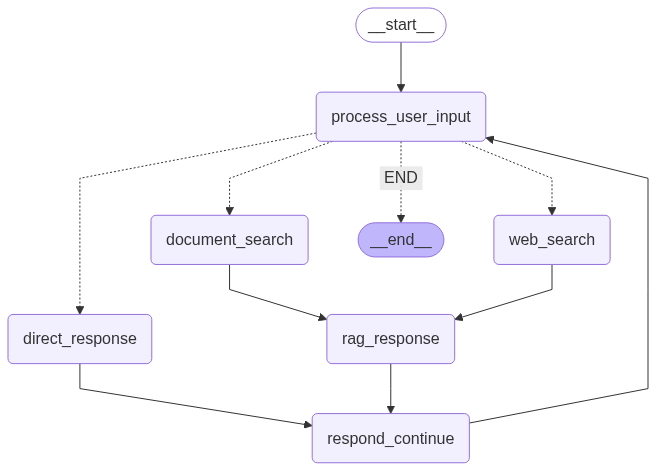

In [ ]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

Primer korišćenja konačnog agenta.

In [ ]:
user_input = input("Korisnik: ")

inputs = {"messages": [HumanMessage(content=user_input)],
          "end_conversation": False,
          "documents_search_required":False,
          "search_required": False,
          "documents_response":None,
          "search_results": None,
          "num_steps":0}
try:
   end_state = graph.invoke(inputs)
except KeyError as e:
    print(f"Kraj razgovora.")



Korisnik: "Kada je kazna preko 500 hiljada prema Zakonu o zaštiti vazduha?"
---PROVERA POTREBE ZA PRETRAGOM---
---PRETRAGA DOKUMENATA---
---RAG ODGOVOR---
---ODGOVOR + NASTAVAK RAZGOVORA-----
ODGOVOR:
Prema Zakonu o zaštiti vazduha, kazna preko 500.000 dinara odnosi se na slučajeve kršenja zakona u slučajevima kao što su ne dostavljanje Agenciji podataka o kvalitetu vazduha i rezultata merenja, neizradi Plan operatera za smanjenje emisija, neupisivanje srednjih postrojenja u registar, nedostavljanje podataka o skladištenju i transportu motornog benzina, kao i nedostavljanje podataka o upotrebi organskih rastvarača. Ovi slučajevi predstavljaju ozbiljne kršenja zakona. Kazna preko 500.000 dinara je zahtevana od strane pravno lica ili preduzetnika koji ih krše.

Obvestite me ako imate još pitanja, molim.
"Kakvo je zagađenje vazduha u Srbiji na dan 24.7.2025.?"
---PROVERA POTREBE ZA PRETRAGOM---
---WEB PRETRAGA---
---RAG ODGOVOR---
---ODGOVOR + NASTAVAK RAZGOVORA-----
ODGOVOR:
Kvalitet vaz

Kraći primer isprobavanja grafa sa čuvanjem stanja.

In [ ]:
from langgraph.checkpoint.memory import InMemorySaver

in_memory_checkpointer = InMemorySaver()
graph_with_memory = graph_builder.compile(checkpointer=in_memory_checkpointer)

In [ ]:
from pprint import pprint

In [ ]:
config = {'configurable': {'thread_id': 'T1'}}

user_input = input("Korisnik: ")

inputs = {"messages": [HumanMessage(content=user_input)],
          "end_conversation": False,
          "documents_search_required":False,
          "search_required": False,
          "documents_response":None,
          "search_results": None,
          "num_steps":0}
          # "response_src":""}

try:
  end_state = graph_with_memory.invoke(inputs,config=config)
except KeyError as e:
    print(f"Kraj razgovora.")


Korisnik: "Kada je kazna preko 500 hiljada prema Zakonu o zaštiti vazduha?"
---PROVERA POTREBE ZA PRETRAGOM---
---PRETRAGA DOKUMENATA---
---RAG ODGOVOR---
---ODGOVOR + NASTAVAK RAZGOVORA-----
ODGOVOR:
Prema Zakonu o zaštiti vazduha, kazna preko 500.000 dinara odnosi se na slučajeve kršenja zakona u slučajevima kao što su ne dostavljanje Agenciji podataka o kvalitetu vazduha i rezultata merenja, neizradi Plan operatera za smanjenje emisija, neupisivanje srednjih postrojenja u registar, nedostavljanje podataka o skladištenju i transportu motornog benzina, kao i nedostavljanje podataka o upotrebi organskih rastvarača. Ovi slučajevi predstavljaju ozbiljne kršenja zakona. Kazna preko 500.000 dinara je zahtevana od strane pravno lica ili preduzetnika koji ih krše.

Obvestite me ako imate još pitanja, molim.
"Kakvo je zagađenje vazduha u Srbiji na dan 24.7.2025.?"
---PROVERA POTREBE ZA PRETRAGOM---
---WEB PRETRAGA---
---RAG ODGOVOR---
---ODGOVOR + NASTAVAK RAZGOVORA-----
ODGOVOR:
Kvalitet vaz

Čuvanje podataka o koracima iz grafa sa čuvanjem stanja kako bi se kasnije izračunao prosečan broj koraka.

In [ ]:
num_steps_list = []

for state_snapshot in graph_with_memory.get_state_history(config):
  print(state_snapshot.tasks)
  num_steps_list.append(state_snapshot.tasks)

(PregelTask(id='69edaf04-3096-716d-1e63-7d801f5890b0', name='process_user_input', path=('__pregel_pull', 'process_user_input'), error="KeyError('__end__')", interrupts=(), state=None, result={'end_conversation': True, 'num_steps': 9}),)
(PregelTask(id='60a2f074-d1c4-3607-3147-6152d717feab', name='respond_continue', path=('__pregel_pull', 'respond_continue'), error=None, interrupts=(), state=None, result={'messages': [HumanMessage(content='stop', additional_kwargs={}, response_metadata={}, id='69a90840-9534-421f-a0e4-a4bb9f19872d')], 'num_steps': 8}),)
(PregelTask(id='ae0cbf61-4cf0-c1ae-17fb-496e6fe04349', name='rag_response', path=('__pregel_pull', 'rag_response'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='Kvalitet vazduha u Srbiji danas, 24. jula 2025, je visok, sa nivoom između 250 i 320.', additional_kwargs={}, response_metadata={}, id='f53bb3e9-1f98-415c-a246-65ac6ee9b74e')], 'num_steps': 7}),)
(PregelTask(id='a4fb1792-4ce7-4427-a329-9c84c4e5cb3

In [ ]:
num_steps_list

[(PregelTask(id='69edaf04-3096-716d-1e63-7d801f5890b0', name='process_user_input', path=('__pregel_pull', 'process_user_input'), error="KeyError('__end__')", interrupts=(), state=None, result={'end_conversation': True, 'num_steps': 9}),),
 (PregelTask(id='60a2f074-d1c4-3607-3147-6152d717feab', name='respond_continue', path=('__pregel_pull', 'respond_continue'), error=None, interrupts=(), state=None, result={'messages': [HumanMessage(content='stop', additional_kwargs={}, response_metadata={}, id='69a90840-9534-421f-a0e4-a4bb9f19872d')], 'num_steps': 8}),),
 (PregelTask(id='ae0cbf61-4cf0-c1ae-17fb-496e6fe04349', name='rag_response', path=('__pregel_pull', 'rag_response'), error=None, interrupts=(), state=None, result={'messages': [AIMessage(content='Kvalitet vazduha u Srbiji danas, 24. jula 2025, je visok, sa nivoom između 250 i 320.', additional_kwargs={}, response_metadata={}, id='f53bb3e9-1f98-415c-a246-65ac6ee9b74e')], 'num_steps': 7}),),
 (PregelTask(id='a4fb1792-4ce7-4427-a329-9c84

In [ ]:
sumNums = sum(task[0].result['num_steps'] for task in num_steps_list if task[0].result is not None)

average_num_steps = sumNums/len(num_steps_list)

print("Prosečan broj koraka: ", average_num_steps)

Prosečan broj koraka:  3.8421052631578947


Prikaz dosadašnje sadržaja datoteke u kojoj su čuvane konverzacije.

In [ ]:
with open('chat_log.txt', 'r') as file:
    content = file.read()

print(content)

Pitanje korisnika:
Kada je kazna za zagađenje vazduha preko 500k prema zakonu?
Odgovor:
Prema zakonu, kazna za zagađenje vazduha preko 500.000 dinara nije direktno navedena. Međutim, najveća kazna u ovom slučaju je 500.000 dinara. To je najveća kazna navedena u članku.
Broj koraka: 3
---------------------------------------------
Pitanje korisnika:
Kada je kazna za zagađenje vazduha preko 500k prema zakonu?
Odgovor:
Prema zakonu, kazna za zagađenje vazduha preko 500.000 dinara nije direktno navedena. Međutim, najveća kazna u ovom slučaju je 500.000 dinara. To je najveća kazna navedena u članku.
Broj koraka: 3
---------------------------------------------
Pitanje korisnika:
 "Kada je kazna preko 500 hiljada prema Zakonu o zaštiti vazduha?"
Odgovor:
Prema Zakonu o zaštiti vazduha, kazna preko 500.000 dinara odnosi se na slučajeve kršenja zakona u slučajevima kao što su ne dostavljanje Agenciji podataka o kvalitetu vazduha i rezultata merenja, neizradi Plan operatera za smanjenje emisija, 